In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# The scatterplots

## Load and explore the data

For our consideration, we will work with the classic, oft-used  `auto` dataset, that explores the impact of various automobile engine characteristics on the mileage of the automobile. Perhaps the reader has encountered this dataset before, especially in other SupportVectors workshops, or perhaps in other data science or machine learning textbooks.

This data has some missing values, which we will elide, before we continue with the visualization journey.

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/Auto.csv'
data = pd.read_csv(source)
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
114,26.0,4,98.0,90,2265,15.5,73,2,fiat 124 sport coupe
278,31.5,4,89.0,71,1990,14.9,78,2,volkswagen scirocco
237,30.5,4,98.0,63,2051,17.0,77,1,chevrolet chevette
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
72,15.0,8,304.0,150,3892,12.5,72,1,amc matador (sw)


In [3]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,397.0,NaN,NaN,NaN,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,NaN,NaN,NaN,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,NaN,NaN,NaN,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
horsepower,397,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,397.0,NaN,NaN,NaN,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,NaN,NaN,NaN,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,NaN,NaN,NaN,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,NaN,NaN,NaN,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0
name,397,304,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, the feature `name` of an automobile is irrelevant to its mileage; therefore, we will drop it. We will also drop records where `horsepower` has missing values as `?`. Next, we will convert `horsepower` to a numerical value, and `origin` to a `string` value. (We know, *a priori* from the documentation of the dataset that the geographical origin of the automobile is encoded as a number `1, 2, 3`.

In [4]:
data = data[data.horsepower !='?'] \
            .astype({'horsepower':'float', 'origin':'string'}) \
            .drop(columns='name')

## Scatterplots using `matplotlib`

First, let us see how we can render the scatterplots using `matplotlib`.

### A simple scatter plot

Let us start by plotting a simple scatterpoint of `horsepower` vs `mpg`.

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

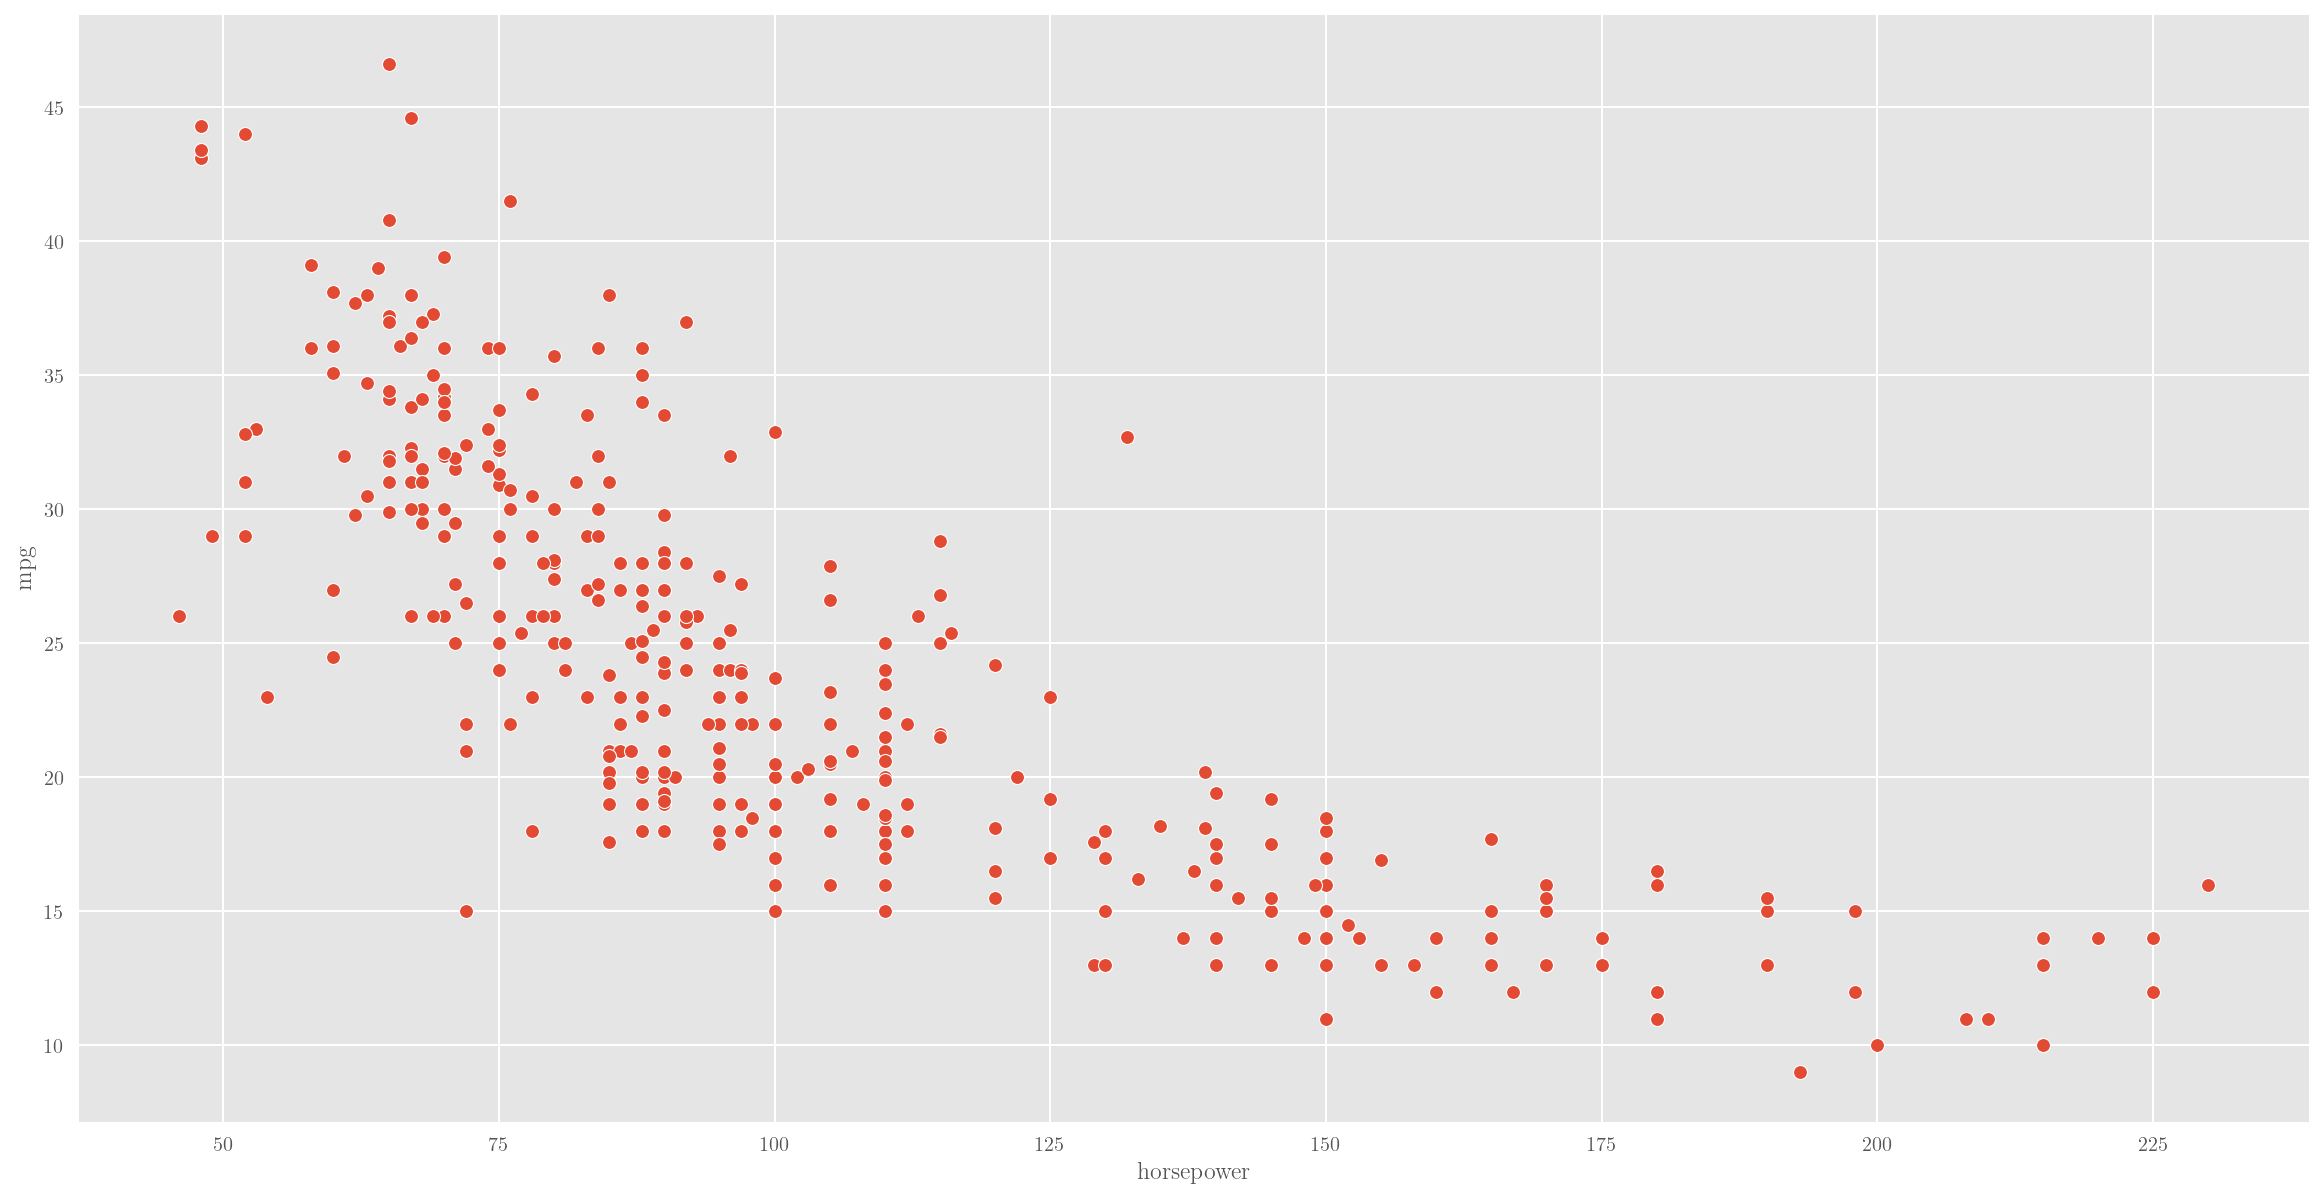

In [5]:
sns.scatterplot(data=data, x='horsepower', y='mpg')

As usual, it produces a graph that leaves a lot to be desired to make it look aethetically pleasing. Let us re-tread the path we have taken with the previous notebooks pertaining to the bar plots.

### Applying a dash of style 

We will do the following:

* resize the figure
* apply the `ggplot` theme
* pick a color for the points based on the geographical origin of the automobile.
* add a bit of transparency, for aesthetics
* increase the size of the points
* add a title
* slightly change the `xlabel` and `ylabel`.
* improve the text formatting with $\LaTeX$ typesetting
* finally, set a tight layout and remove output clutter

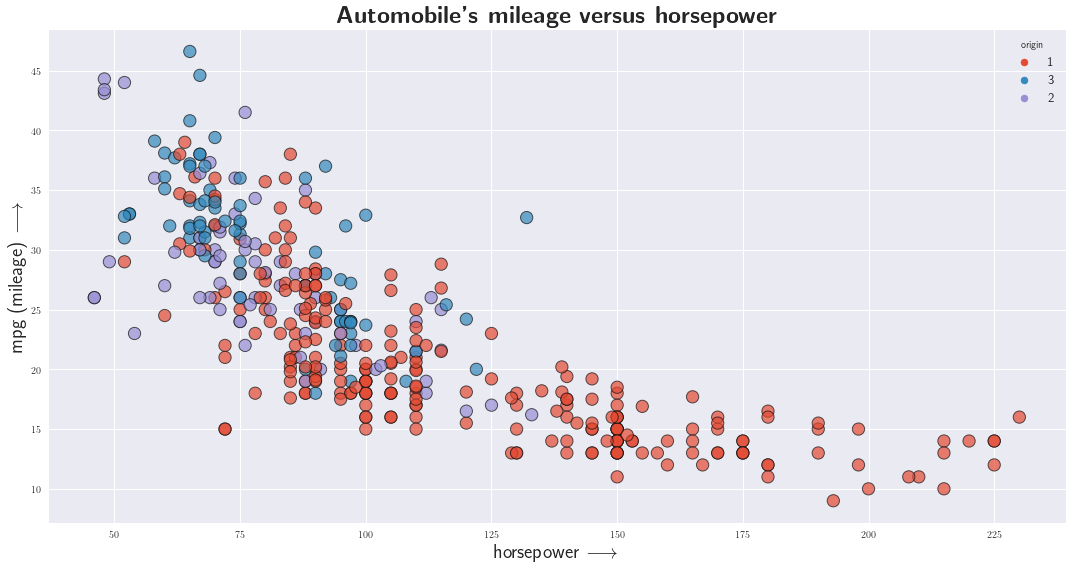

In [6]:
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=16)

plt.style.use('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize'] = 13         # legend font size
plt.rcParams['axes.labelsize'] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = '15,8'            # resize

sns.set_style('darkgrid')
sns.color_palette('viridis')

sns.scatterplot(data=data, x='horsepower',
                y='mpg',
                s=150,
                hue='origin',
                edgecolor='k',
                alpha=0.7)

plt.title(r"\textbf{Automobile's mileage versus horsepower}", size=24)
plt.xlabel(r"{horsepower $\longrightarrow$}", size=20)
plt.ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20)

plt.tight_layout()

Observe that unlike with `matplotlib`, here we did not have to resort to `groupby()` on the dataframe, in order to color the points based on a categorical variable (`origin`).

If we base the color of the points an a scalar variable, that too is essentially the same code.

### Color points by weight of an automobile

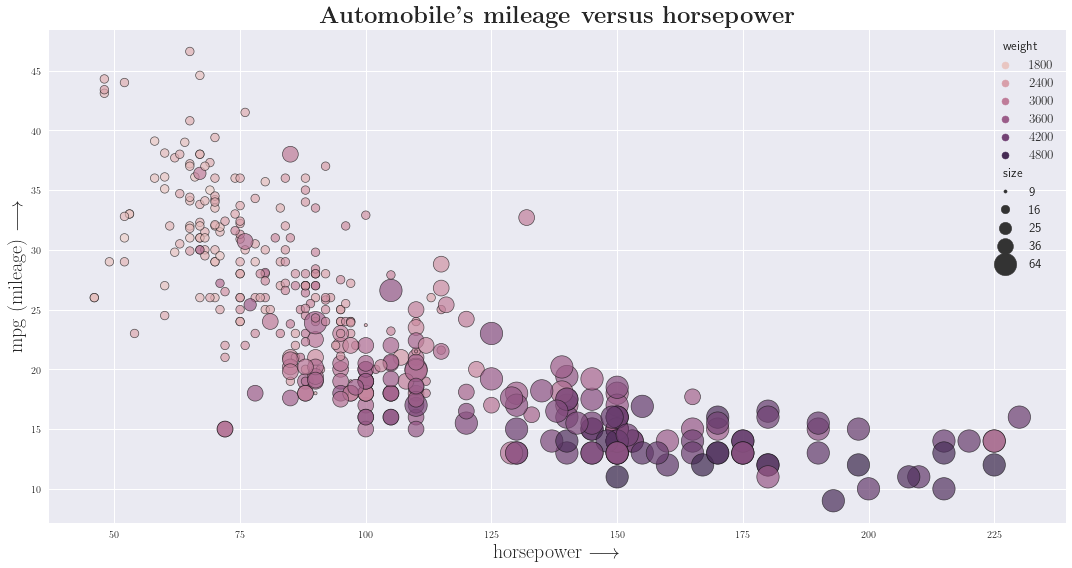

In [7]:
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=16)

plt.style.use('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize'] = 13         # legend font size
plt.rcParams['axes.labelsize'] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = '15,8'            # resize

sns.set_style('darkgrid')
sns.color_palette('viridis')

data['size'] = np.power(data.cylinders, 2)

# To render the sizes we would like to see, we need this in seaborn

sizes = (10, 500)  # specify the mix-max sizes of the points.

sns.scatterplot(data=data, x='horsepower',
                y='mpg',
                size='size',
                hue='weight',
                edgecolor='k',
                alpha=0.7,
                sizes = sizes, 
                )

plt.title(r"\textbf{\textrm{Automobile's mileage versus horsepower}}", size=24)
plt.xlabel(r"\textrm{horsepower} $\longrightarrow$", size=20)
plt.ylabel(r"{\textrm {mpg (mileage)} $\longrightarrow$}", size=20)


plt.tight_layout()

### Adding annotations

Since `seaborn` uses `matplotlib` underneath, we can use the `matplotlib.pyplot.annotate()` function to render the annotations.

Let us draw attention to the automobiles with the highest and lowest mileage and horsepower, respectively. First, we need to identify these rows in the data.

In [8]:
min_mpg = data[data.mpg == data.mpg.min()].iloc[0]
max_mpg = data[data.mpg == data.mpg.max()].iloc[0]

min_hp = data[data.horsepower == data.horsepower.min()].iloc[0]
max_hp = data[data.horsepower == data.horsepower.max()].iloc[0]

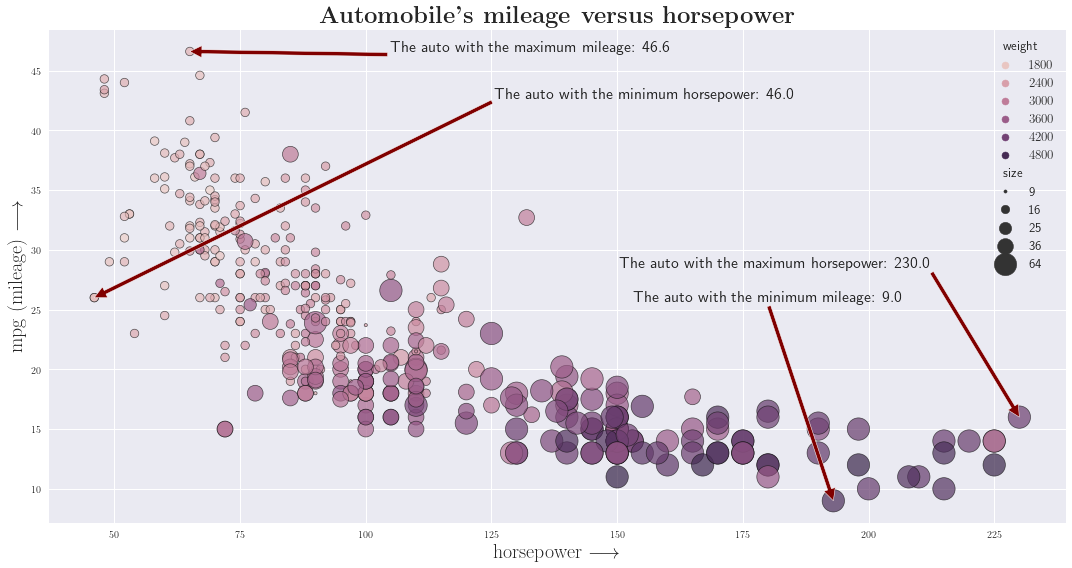

In [9]:
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=16)

plt.style.use('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize'] = 13         # legend font size
plt.rcParams['axes.labelsize'] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = '15,8'            # resize

sns.set_style('darkgrid')
sns.color_palette('viridis')


data['size'] = np.power(data.cylinders, 2)
sizes = (10, 500)  # specify the mix-max sizes of the points.

sns.scatterplot(data=data, x='horsepower',
                y='mpg',
                size='size',
                hue='weight',
                edgecolor='k',
                alpha=0.7,
                sizes = sizes, 
                )

plt.title(r"\textbf{\textrm{Automobile's mileage versus horsepower}}", size=24)
plt.xlabel(r"\textrm{horsepower} $\longrightarrow$", size=20)
plt.ylabel(r"{\textrm {mpg (mileage)} $\longrightarrow$}", size=20)



# annotations
min_mpg_text = f'The auto with the minimum mileage: {min_mpg.mpg}'
max_mpg_text = f'The auto with the maximum mileage: {max_mpg.mpg}'
min_hp_text = f'The auto with the minimum horsepower: {min_hp.horsepower}'
max_hp_text = f'The auto with the maximum horsepower: {max_hp.horsepower}'

plt.annotate(min_mpg_text,
             xy=(min_mpg.horsepower, min_mpg.mpg),
             xytext=(-200, 200),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.annotate(max_mpg_text,
             xy=(max_mpg.horsepower, max_mpg.mpg),
             xytext=(200, 0),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.annotate(min_hp_text,
             xy=(min_hp.horsepower, min_hp.mpg),
             xytext=(400, 200),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.annotate(max_hp_text,
             xy=(max_hp.horsepower, max_hp.mpg),
             xytext=(-400, 150),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.tight_layout()

### Zoomed view box

For zoomed views, the approach is essntially to use the underlying `matplotlib` facility. Therefore, the code is almost identical to that in the `visualization-scatterplot.ipynb` where we have done it with `matplotlib`.

We leave it as an exercise for the reader to repeat it with the `seaborn.scatterplot()` in the subplots.

### Gridspec for finer control of geometry

### 3D scatterplot

The `seaborn` library does nor provide much additional features beyond what comes with `matplotlib`, other than minor things like being able to apply a seaborn style.

Therefore, we care going to omit this section altogether: visit the `visualization-scatterplot.ipynb` notebook for the `matplotlib` approach, and `visualization-scatterplot-plotly.ipynb` for the use of `plotly` to create engaging, interactive 3d-plots.

## Seaborn Joint-plots

One of the distinguishing features of the `seaborn` plotting library is the ease with which one can create compound plots as **joint plots** that put together various statistical plots  of the data and put it adjacent to, say, the scatter plot of the data itself.

Let us explore this with the simple versions first. For this, simply invoke the method `seaborn.jointplot()`.

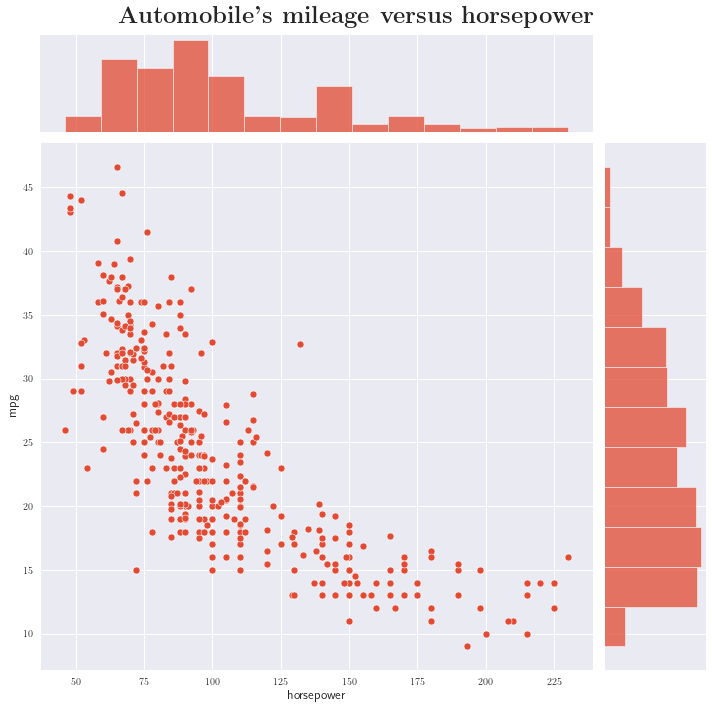

In [10]:
ax = sns.jointplot(data=data,
                   x='horsepower',
                   y='mpg',
                   height=10,  
                  )

ax.fig.suptitle(r"\textbf{\textrm{Automobile's mileage versus horsepower}}", size=24)

plt.tight_layout()

Let us add the kernel density estimators to the histogram, and add a lowess-regression curve through the data. For this, we should add the argument `kind=reg` (which will draw a `regplot`)

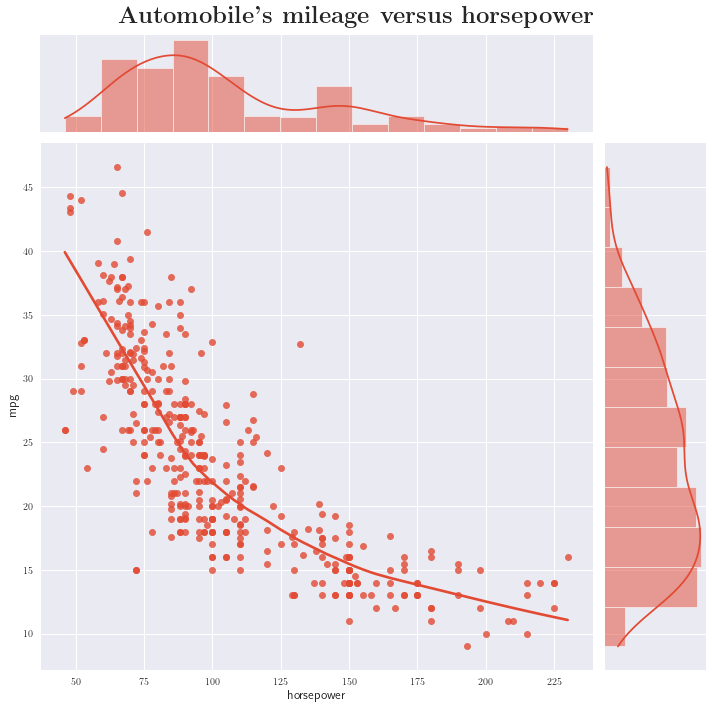

In [11]:
ax = sns.jointplot(data=data,
                   x='horsepower',
                   y='mpg',
                   height=10,  
                   kind='reg',
                   lowess=True
                  )
ax.fig.suptitle(r"\textbf{\textrm{Automobile's mileage versus horsepower}}", size=24)

plt.tight_layout()

We may want to change the number of bins in the marginal histogram. To do so, use:

```marginal_kws=dict(bins=25, fill=False)```

To increase the height of the marginal histograms, use:

```ratio = 2```

This is the ratio of the height of the main-plot with respect to the marginal plots.

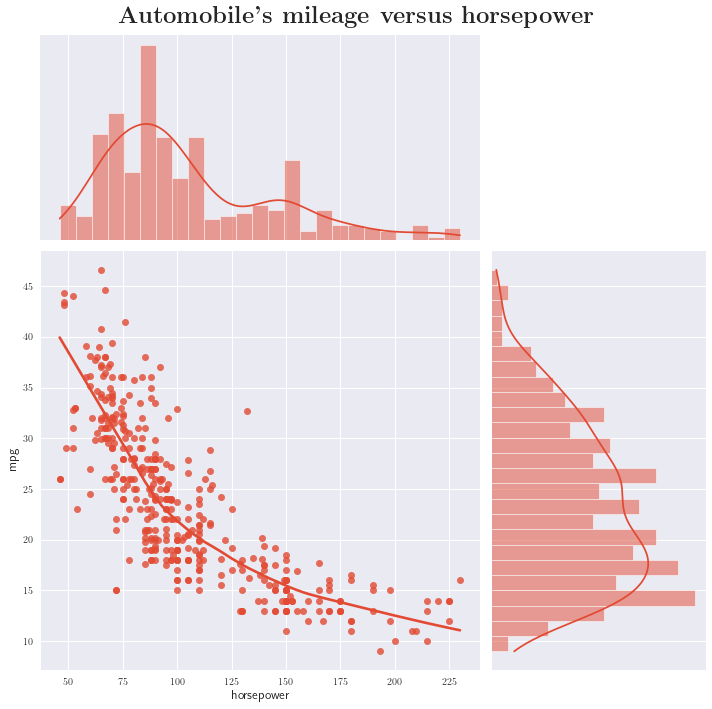

In [12]:
rc('text', usetex=True)
g = sns.jointplot(data=data,
                   x='horsepower',
                   y='mpg',
                   height=10,  
                   kind='reg',
                   lowess=True,
                   marginal_kws=dict(bins=25), 
                   ratio = 2,)
g.fig.suptitle(r"$\textbf{\textrm{Automobile's mileage versus horsepower}}$", size=24)

plt.tight_layout()

To this, we can superimpose further plots using `plot_joint()` and `plot_marginals()` methods. Let us see a few examples:

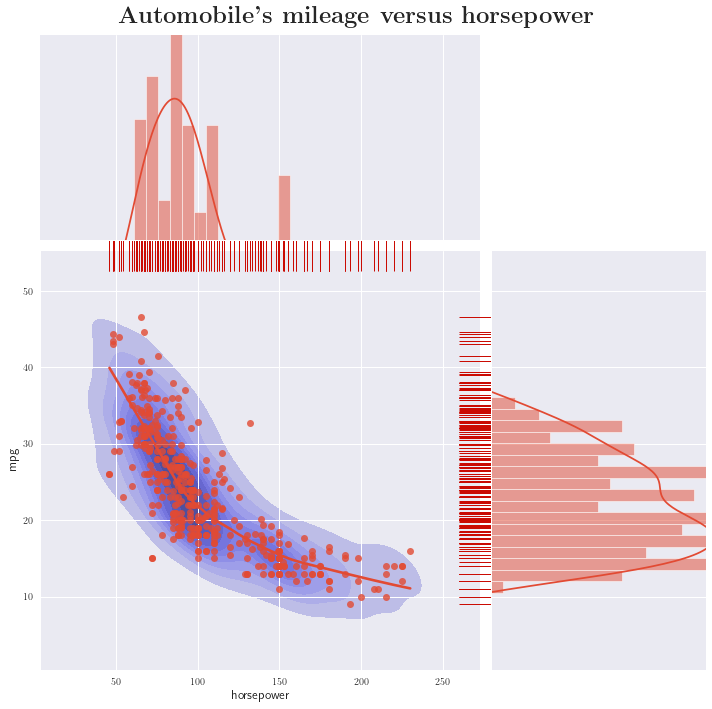

In [13]:
rc('text', usetex=True)
g = sns.jointplot(data=data,
                   x='horsepower',
                   y='mpg',
                   height=10,  
                   kind='reg',
                   lowess=True,
                   marginal_kws=dict(bins=25), 
                   ratio = 2,)
# add a kernel density estimator plot to the scatterplot
g.plot_joint(sns.kdeplot, 
             color='midnightblue', 
             zorder=0, 
             levels=10, 
             shade=True)

# add the rug-plot to the margins
g.plot_marginals(sns.rugplot, 
                 color="r", 
                 height=-.15, 
                 clip_on=False)

g.fig.suptitle(r"$\textbf{\textrm{Automobile's mileage versus horsepower}}$", size=24)

plt.tight_layout()

### A more powerful approach with `JointGrid`

The `seaborn` library developers deliberately kept the `jointplot()` method with limited functionality. For example, note that we did not give a color to the points based on the data-features.

In order to gain more fine-grained control of the plot, we are expected to use the `JoinGrid` object instead. Let us try that now. We will first start with an empty `JointGrid` plot.

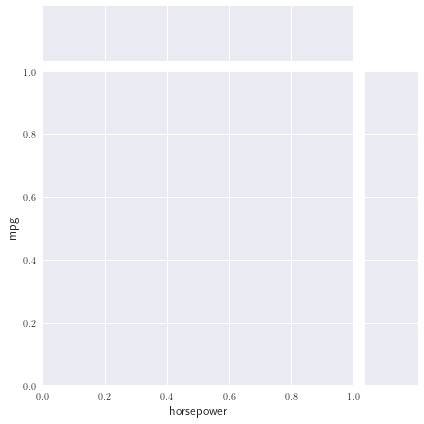

In [14]:
# Start with an empty joint-grid
g = sns.JointGrid( data = data, x='horsepower', y='mpg',)

Let us now add a scatter plot to it.

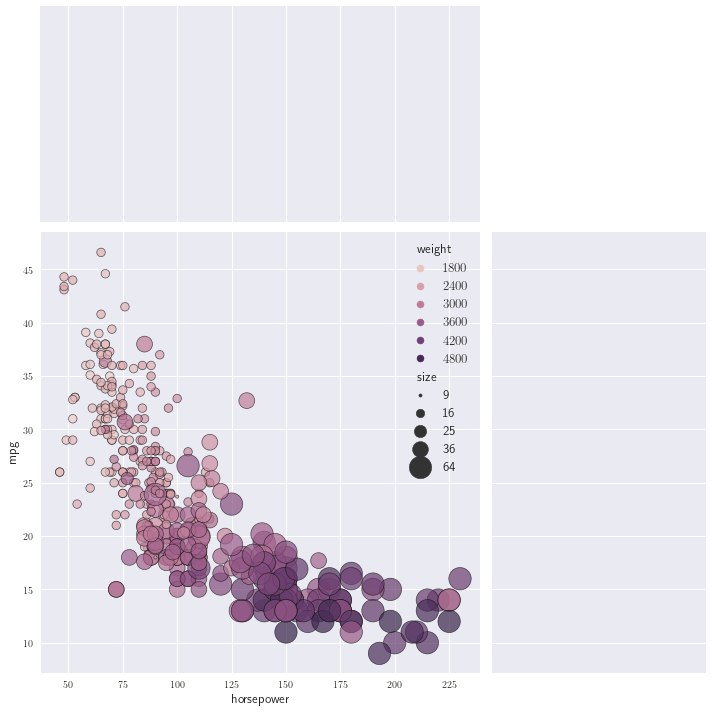

In [15]:
data['size'] = np.power(data.cylinders, 2)
sizes = (10, 500)  # specify the mix-max sizes of the points.


# Start with an empty joint-grid
g = sns.JointGrid( data = data, 
                  x='horsepower', 
                  y='mpg',
                  height=10,            # plot height
                  ratio=2)              # the ratio of the height main joint-plot to the marginals.

sns.scatterplot(data = data, x='horsepower',
                y='mpg',
                size='size',
                hue='weight',
                edgecolor='k',
                alpha=0.7,
                sizes = sizes, 
                ax = g.ax_joint,
                
                )

plt.tight_layout()

Now, let us also add the kernel density estimator contour lines to this figure.

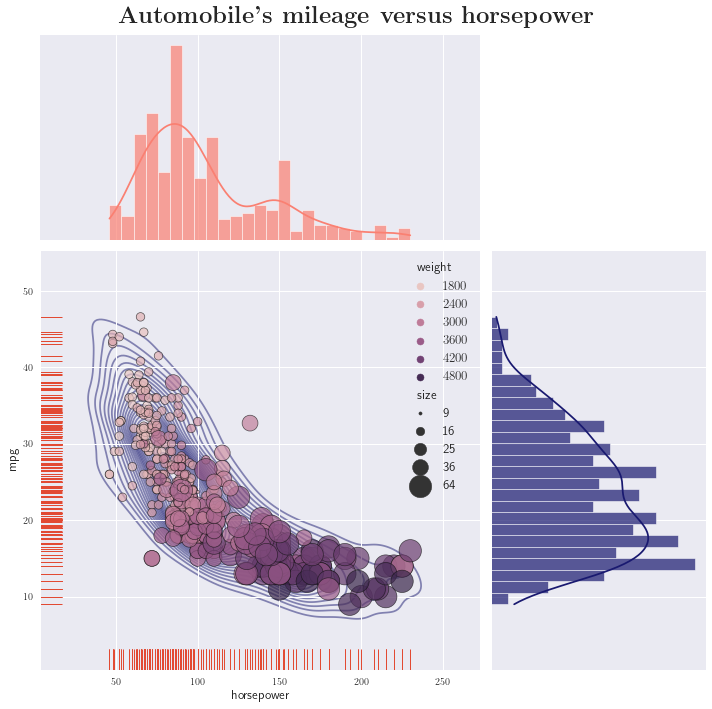

In [16]:
import seaborn as sns

data['size'] = np.power(data.cylinders, 2)
sizes = (10, 500)  # specify the mix-max sizes of the points.


# Start with an empty joint-grid
g = sns.JointGrid(data=data,
                  x='horsepower',
                  y='mpg',
                  height=10,            # plot height
                  ratio=2)              # the ratio of the height main joint-plot to the marginals.


# Add the main scatterplot to the joint-plot
sns.scatterplot(data=data,              
                x='horsepower',
                y='mpg',
                size='size',
                hue='weight',
                edgecolor='k',
                alpha=0.7,
                sizes=sizes,
                ax=g.ax_joint,
                )

# Add the kde contours to the joint-plot
sns.kdeplot(data=data,                 
            x='horsepower',
            y='mpg',
            size='size',
            color='midnightblue',
            zorder=0,
            levels=25,
            alpha=0.5,
            shade=False, ax=g.ax_joint)

# Add a horsepower histogram in the top marginal plot
sns.histplot(data,
             x='horsepower',
             color='salmon',
             ax=g.ax_marg_x,
             bins=25,
             kde=True,
             alpha=0.7
             )

# Add a mpg histogram in the right marginal plot
sns.histplot(data,
             y='mpg',
             color='midnightblue',
             ax=g.ax_marg_y,
             bins=25,
             kde=True,
             alpha=0.7
             )

# Add rugplot to show the data-points projected onto the axes.
sns.rugplot(data=data, 
            x='horsepower', 
            y='mpg', 
            height=.05, 
            ax=g.ax_joint)

g.fig.suptitle(r"$\textbf{\textrm{Automobile's mileage versus horsepower}}$", size=24)

plt.tight_layout()